In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("kc_house_data.csv")

In [4]:
# Display the first few rows of the dataset
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
# Display summary statistics of the dataset
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

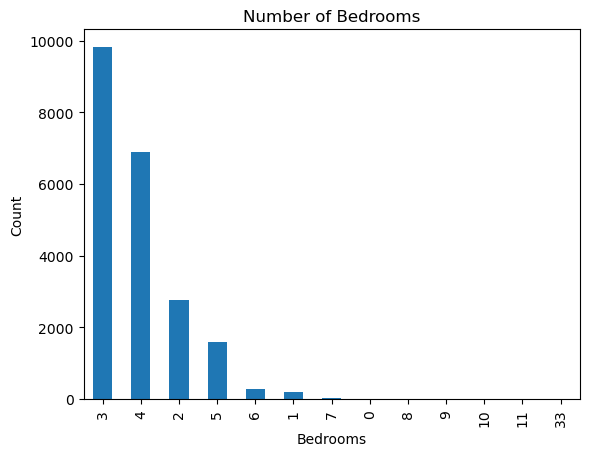

In [6]:
# Plot the distribution of the number of bedrooms
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

<Figure size 1000x1000 with 0 Axes>

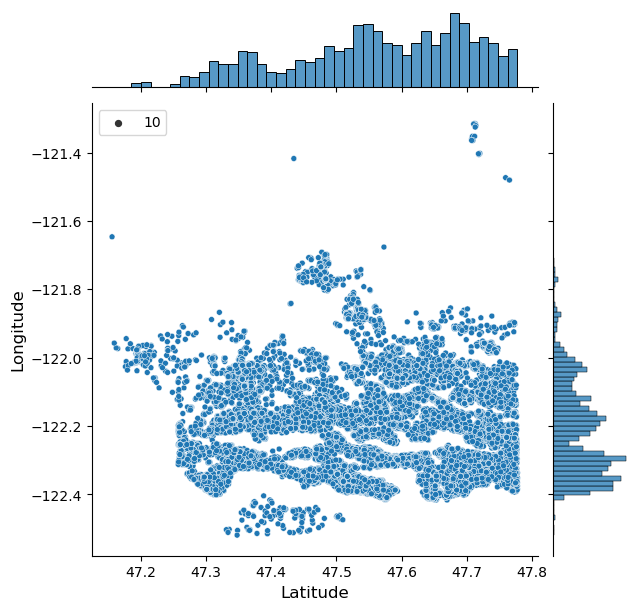

In [7]:
# Create a joint plot of latitude and longitude
plt.figure(figsize=(10, 10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

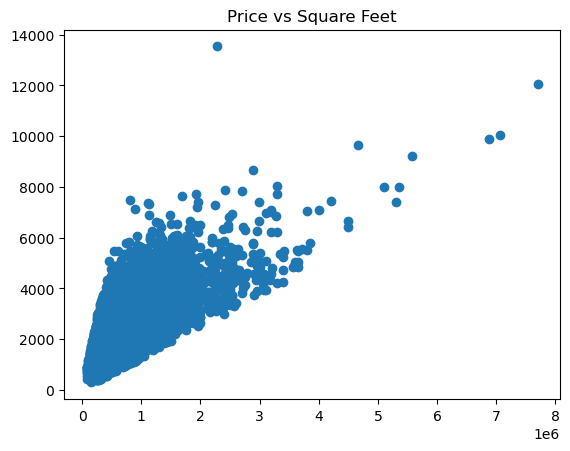

In [8]:
# Scatter plot of price vs square feet
plt.scatter(data.price, data.sqft_living)
plt.title("Price vs Square Feet")
plt.show()

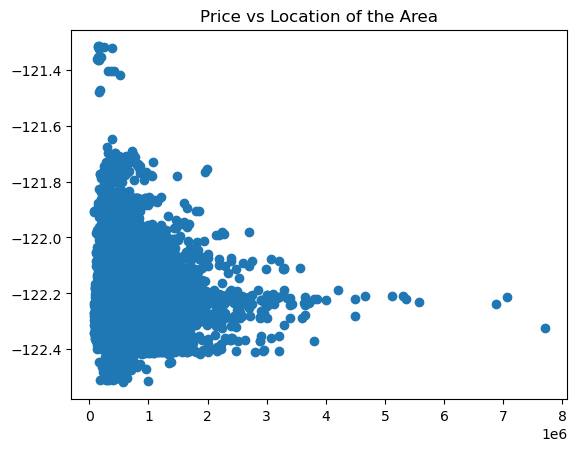

In [9]:
# Scatter plot of price vs location (longitude)
plt.scatter(data.price, data.long)
plt.title("Price vs Location of the Area")
plt.show()

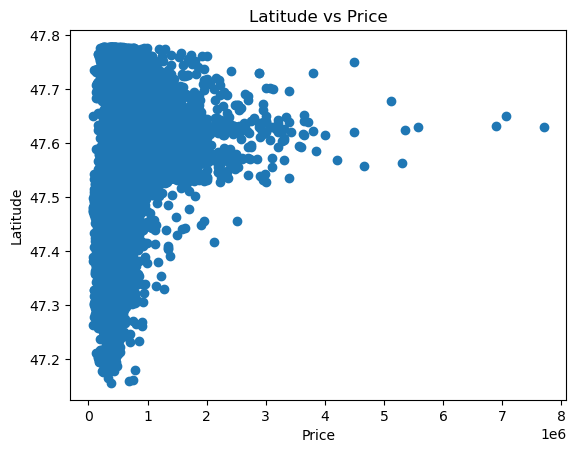

In [10]:
# Scatter plot of price vs latitude
plt.scatter(data.price, data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")
plt.show()

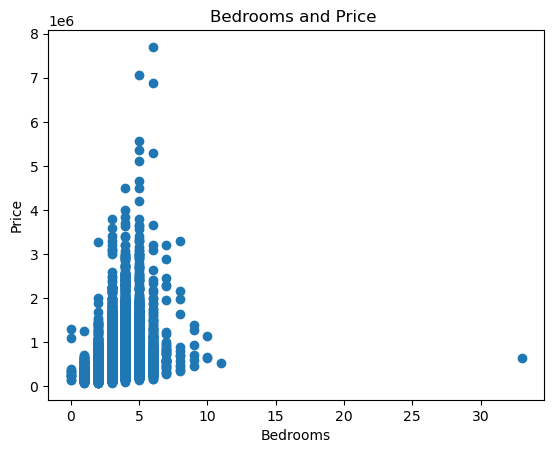

In [11]:
# Scatter plot of bedrooms vs price
plt.scatter(data.bedrooms, data.price)
plt.title("Bedrooms and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

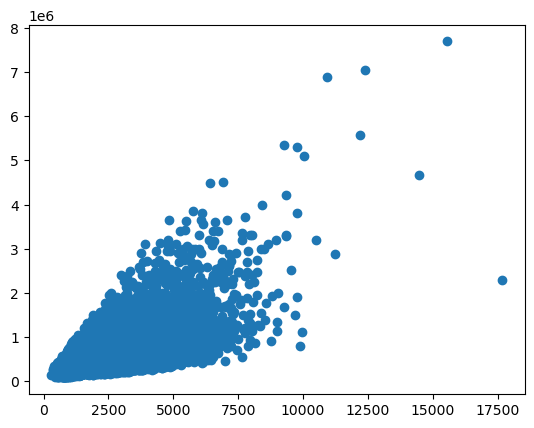

In [12]:
# Scatter plot of total square footage vs price
plt.scatter((data['sqft_living'] + data['sqft_basement']), data['price'])
plt.show()

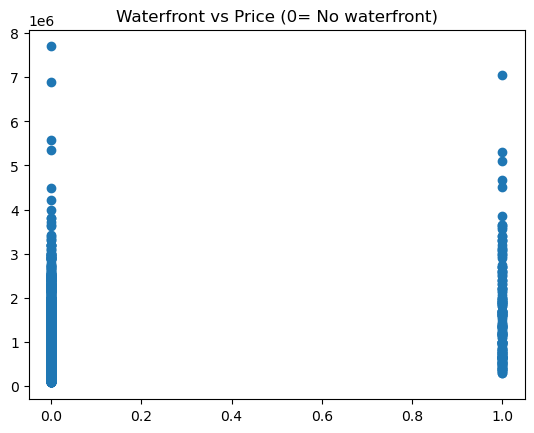

In [13]:
# Scatter plot of waterfront vs price
plt.scatter(data.waterfront, data.price)
plt.title("Waterfront vs Price (0= No waterfront)")
plt.show()

In [14]:
# Drop unnecessary columns for training
train1 = data.drop(['id', 'price'], axis=1)

In [15]:
# Display the first few rows of the modified dataset
train1.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  20141013T000000         3       1.00         1180      5650     1.0   
1  20141209T000000         3       2.25         2570      7242     2.0   
2  20150225T000000         2       1.00          770     10000     1.0   
3  20141209T000000         4       3.00         1960      5000     1.0   
4  20150218T000000         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

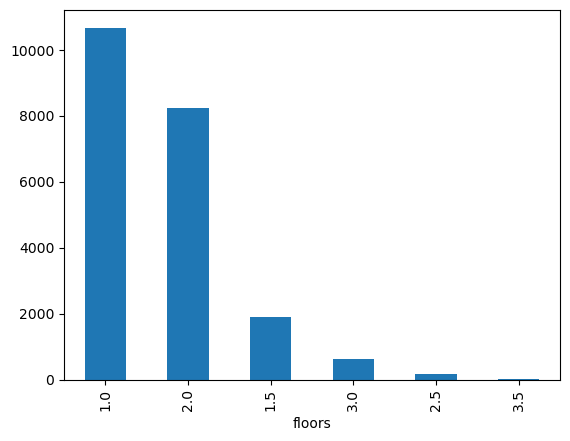

In [16]:
# Plot the distribution of the number of floors
data.floors.value_counts().plot(kind='bar')
plt.show()

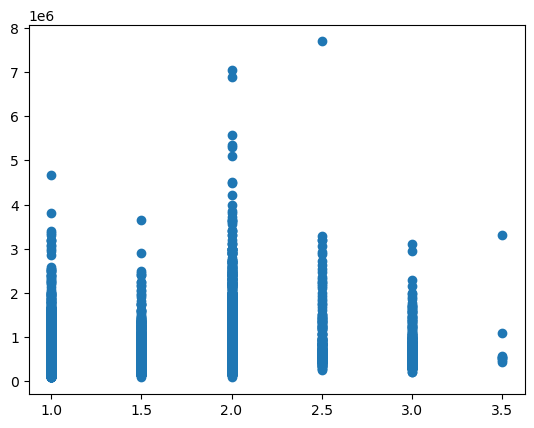

In [17]:
# Scatter plot of floors vs price
plt.scatter(data.floors, data.price)
plt.show()

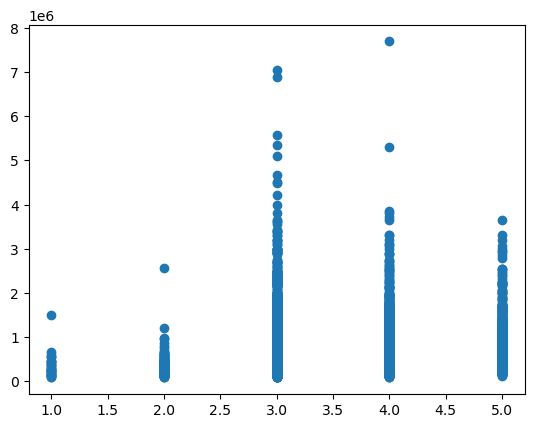

In [18]:
# Scatter plot of condition vs price
plt.scatter(data.condition, data.price)
plt.show()

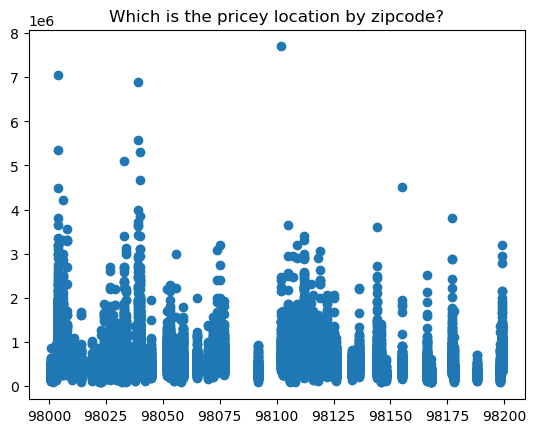

In [19]:
# Scatter plot of zipcode vs price
plt.scatter(data.zipcode, data.price)
plt.title("Which is the pricey location by zipcode?")
plt.show()

In [20]:
# Linear Regression Model
reg = LinearRegression()

In [21]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'], axis=1)

In [22]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10, random_state=2)

In [23]:
# Fit the Linear Regression model
reg.fit(x_train, y_train)

LinearRegression()

In [37]:
# Compute and print the R^2 score for the Linear Regression model
reg_score = reg.score(x_test, y_test)
print("Linear Regression R^2 Score:", reg_score)

Linear Regression R^2 Score: 0.7320342760357688


In [38]:
# Gradient Boosting Regressor Model
params = {
    'n_estimators': 400,
    'max_depth': 5,
    'min_samples_split': 2,
    'learning_rate': 0.1,
    'loss': 'squared_error'
}

clf = ensemble.GradientBoostingRegressor(**params)

In [26]:
# Fit the Gradient Boosting Regressor model
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming you have already loaded your data and defined 'train1' and 'labels'

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10, random_state=2)

# Create and fit the Gradient Boosting Regressor model
clf = GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='squared_error')
clf.fit(x_train, y_train)

# Now you can compute and print the R^2 score for the Gradient Boosting Regressor model
clf_score = r2_score(y_test, clf.predict(x_test))
print("Gradient Boosting Regressor R^2 Score:", clf_score)


Gradient Boosting Regressor R^2 Score: 0.9211859616969557


In [28]:
# Compute and print the R^2 score for the Gradient Boosting Regressor model
clf_score = clf.score(x_test, y_test)
print("Gradient Boosting Regressor R^2 Score:", clf_score)

Gradient Boosting Regressor R^2 Score: 0.9211859616969557


In [29]:
# Staged Predictions for Gradient Boosting Regressor
t_sc = np.zeros((params['n_estimators']), dtype=np.float64)

In [30]:
# Create an array to store the mean squared error at each stage
t_sc = np.zeros((clf.n_estimators,), dtype=np.float64)

# Predictions using each stage of the model
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i] = np.mean((y_test - y_pred) ** 2)


In [31]:
testsc = np.arange((params['n_estimators'])) + 1

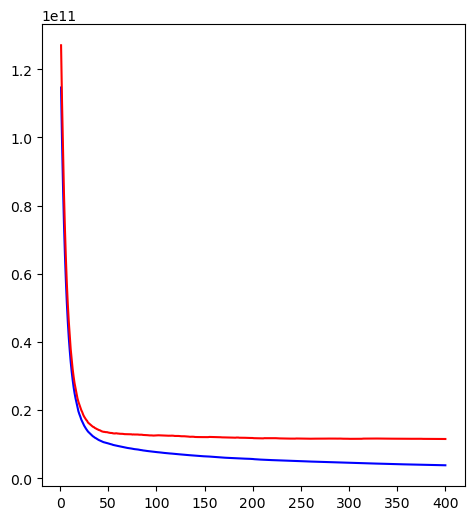

In [32]:
# Plot the training and test scores for each stage
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc, clf.train_score_, 'b-', label='Set dev train')
plt.plot(testsc, t_sc, 'r-', label='Set dev test')
plt.show()

In [33]:
# Principal Component Analysis (PCA)
pca = PCA()

In [34]:
# Fit PCA and transform the data
pca_result = pca.fit_transform(scale(train1))

In [35]:
# Display the results of PCA
print("Explained variance ratio by each principal component:")
print(pca.explained_variance_ratio_)

Explained variance ratio by each principal component:
[2.90500720e-01 1.22297475e-01 1.02491338e-01 7.58799060e-02
 6.69731973e-02 5.57211658e-02 4.85131580e-02 4.64555438e-02
 3.65219068e-02 3.33947485e-02 2.77011748e-02 2.24707490e-02
 1.80460152e-02 1.58509076e-02 1.40611673e-02 1.25581472e-02
 1.05626800e-02 1.50080555e-33 0.00000000e+00]
